In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=sns.load_dataset('taxis')
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
df.shape

(6433, 14)

In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [ ]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [ ]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [ ]:
((df.shape[0]-df.dropna().shape[0])/df.shape[0])*100


1.4301259132597544

In [ ]:
df.dropna()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(6341, 14)

In [ ]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


In [ ]:
df.reset_index(drop=True)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6337,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6338,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6339,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


**EDA**

In [ ]:
#tip is the target column
#tip is numerical feature , analyse with colo =r feature which categoricaal


In [ ]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: xlabel='color', ylabel='tip'>

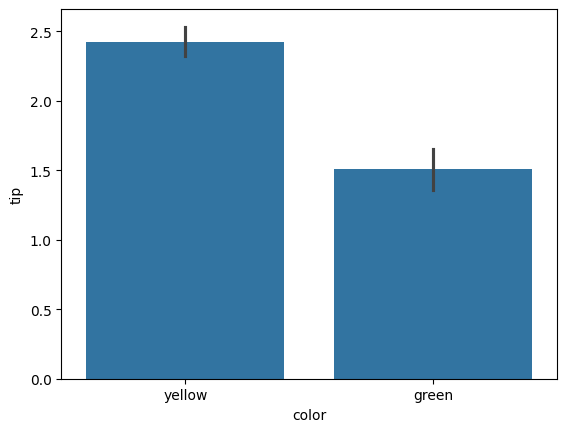

In [ ]:
#graphical analysis of categorical
sns.barplot(x=df['color'],y=df['tip'],estimator='std')
# sns.barplot(x=df.color,y=df.tip)

<Axes: xlabel='color', ylabel='tip'>

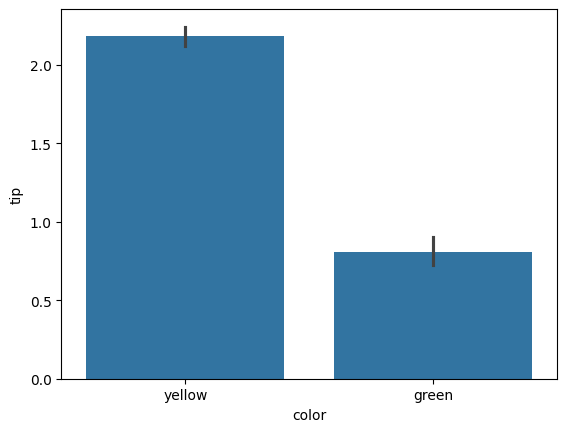

In [ ]:
sns.barplot(x=df['color'],y=df['tip'],estimator='mean')

In [ ]:
tip_stats = df.groupby('color')['tip'].agg(['mean', 'std']).reset_index()
display(tip_stats)

,color,mean,std
0,green,0.806963,1.508946
1,yellow,2.182723,2.425886


Based on the calculations, we can observe the following:

- **Mean Tip:** The mean tip for yellow taxis is generally higher than for green taxis.
- **Standard Deviation of Tip:** The standard deviation of tips for yellow taxis is also higher, indicating more variability in tip amounts compared to green taxis. This suggests that while yellow taxis might receive higher tips on average, the range of tips they receive is also wider.

In [ ]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: xlabel='tip', ylabel='Count'>

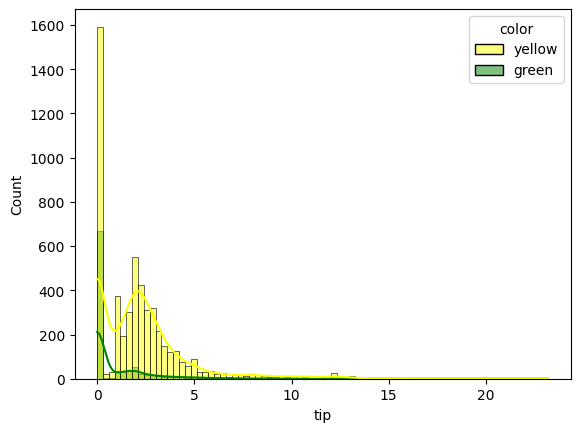

In [ ]:
sns.histplot(x=df.tip,hue=df.color,palette={'yellow':'yellow','green':'green'},kde=True)

 yellow taxis often get higher tips, but the amounts can vary a lot. Green taxis, on the other hand, usually receive smaller tips, and those tips tend to be more consistent.

**Hypothesis**
- H0: distribution of tip for yellow=distribution of tip for green
- H1: distribution of tip for yellow != distribution of tip for green

In [ ]:
yellow_tip=df['tip'][df['color']=='yellow']
green_tip=df['tip'][df['color']=='green']

In [ ]:
yellow_tip

,tip
0,2.15
1,0.00
2,2.36
3,6.15
4,1.10
...,...
5446,2.66
5447,2.36
5448,2.56
5449,2.36


In [ ]:
green_tip

,tip
5451,0.00
5452,0.00
5453,1.20
5454,0.00
5455,0.00
...,...
6428,1.06
6429,0.00
6430,0.00
6431,0.00


In [ ]:
yellow_tip.shape

(5373,)

In [ ]:
green_tip.shape

(968,)

In [ ]:
# Independent T-Test
from scipy import stats

t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
# print("Independent T-Test statistic:", t_stat)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489451e-64


In [ ]:
alpha=0.05  #significant value
print(f"P-value: {p_val}, Alpha: {alpha}")
if p_val < alpha:
    print("Reject null hypothesis: The distribution of tips for yellow taxis is statistically different from green taxis.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference in tip distributions between yellow and green taxis.")

Reject null hypothesis : The tip for yellow category is different that of green.


**on payment**

In [ ]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


<Axes: xlabel='payment', ylabel='tip'>

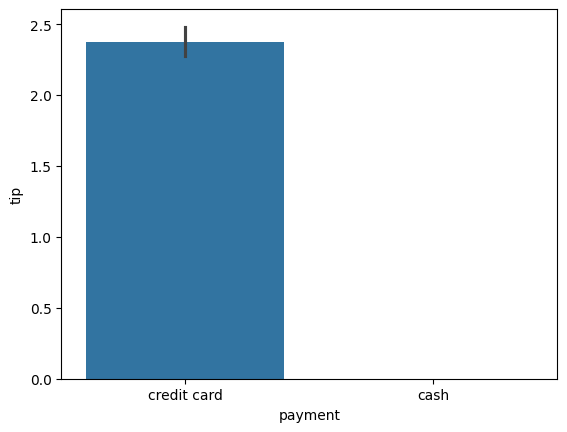

In [ ]:
#graphical analysis of categorical
sns.barplot(x=df['payment'],y=df['tip'],estimator='std')
# sns.barplot(x=df.color,y=df.tip)

<Axes: xlabel='payment', ylabel='tip'>

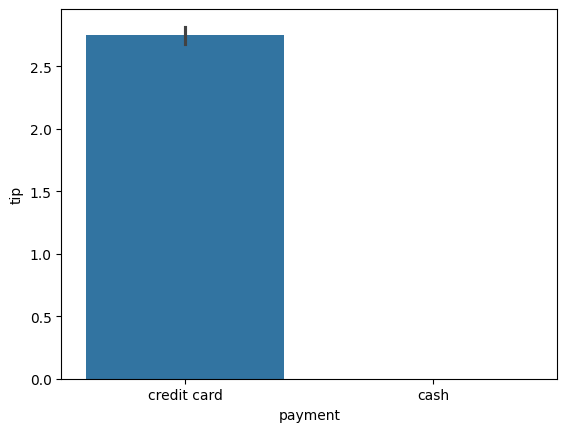

In [ ]:
sns.barplot(x=df['payment'],y=df['tip'],estimator='mean')

In [ ]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


<Axes: xlabel='tip', ylabel='Count'>

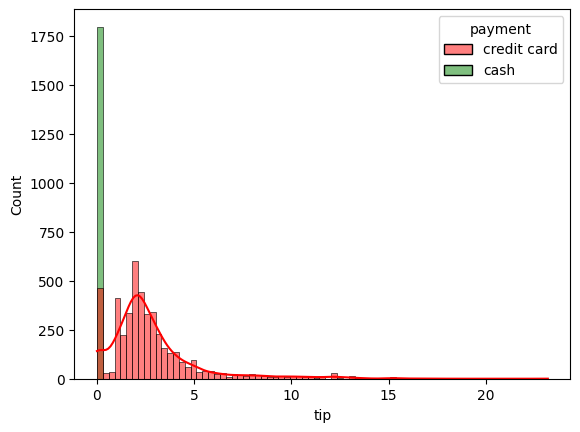

In [ ]:
sns.histplot(x=df.tip,hue=df.payment,palette={'credit card':'red','cash':'green'},kde=True)

**Hypothesis**
- H0: distribution of tip for credit card=distribution of tip for cash
- H1: distribution of tip for credit card != distribution of tip for cash

In [ ]:
credit_card_tip = df['tip'][df['payment'] == 'credit card']
cash_tip = df['tip'][df['payment'] == 'cash']

In [ ]:
credit_card_tip

,tip
0,2.15
2,2.36
3,6.15
4,1.10
5,2.16
...,...
6426,0.50
6428,1.06
6429,0.00
6431,0.00


In [ ]:
cash_tip

,tip
1,0.0
10,0.0
13,0.0
14,0.0
15,0.0
...,...
6420,0.0
6422,0.0
6424,0.0
6427,0.0


In [ ]:
# Independent T-Test
from scipy import stats

t_stat, p_val = stats.ttest_ind(credit_card_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

Independent T-Test statistic: 49.09538452722153
P-value: 0.0


In [ ]:
alpha=0.05  #significant value
print(f"P-value: {p_val}, Alpha: {alpha}")
if p_val < alpha:
    print("Reject null hypothesis: The distribution of tips for credit card payments is statistically different from cash payments.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference in tip distributions between credit card and cash payments.")

P-value: 0.0, Alpha: 0.05
Reject null hypothesis: The distribution of tips for credit card payments is statistically different from cash payments.


In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

**for pickup_borough**

In [ ]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

In [ ]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


/tmp/ipython-input-978108477.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_borough'], palette=['orange','green','yellow','blue'])


<Axes: xlabel='pickup_borough', ylabel='count'>

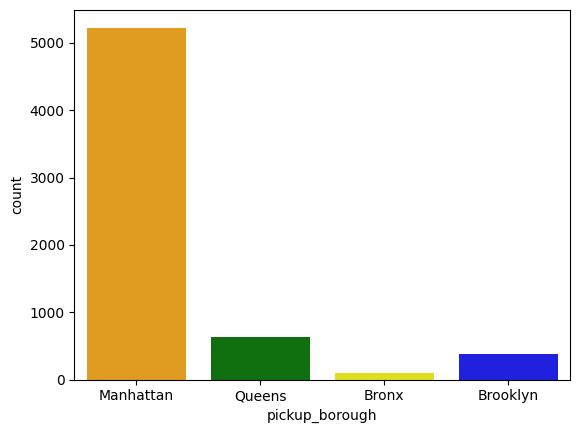

In [ ]:
sns.countplot(x=df['pickup_borough'], palette=['orange','green','yellow','blue'])

/tmp/ipython-input-3035720.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'], palette=['orange','green','yellow','blue'],estimator='std')


<Axes: xlabel='pickup_borough', ylabel='tip'>

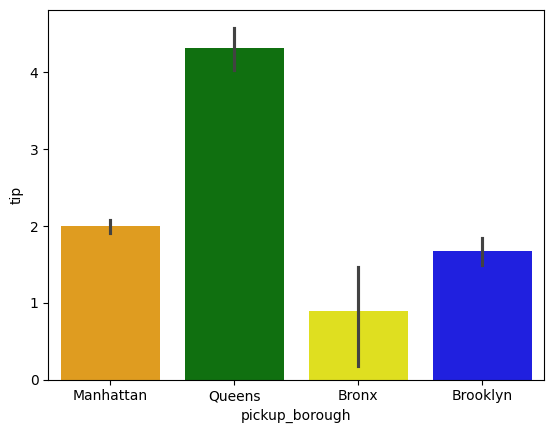

In [ ]:
sns.barplot(x=df['pickup_borough'],y=df['tip'], palette=['orange','green','yellow','blue'],estimator='std')

/tmp/ipython-input-159885549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'], palette=['orange','green','yellow','blue'],estimator='mean')


<Axes: xlabel='pickup_borough', ylabel='tip'>

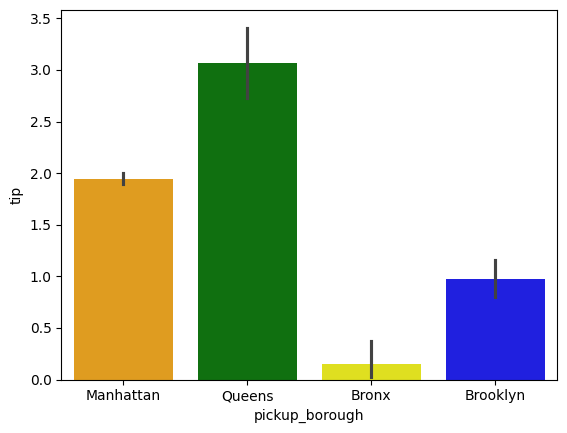

In [ ]:
sns.barplot(x=df['pickup_borough'],y=df['tip'], palette=['orange','green','yellow','blue'],estimator='mean')

In [ ]:
df['tip'].groupby(df['pickup_borough']).std()

,tip
pickup_borough,
Bronx,0.897261
Brooklyn,1.674487
Manhattan,1.997736
Queens,4.323951


In [ ]:
df['tip'].groupby(df['pickup_borough']).mean()

,tip
pickup_borough,
Bronx,0.148586
Brooklyn,0.979127
Manhattan,1.945597
Queens,3.066458


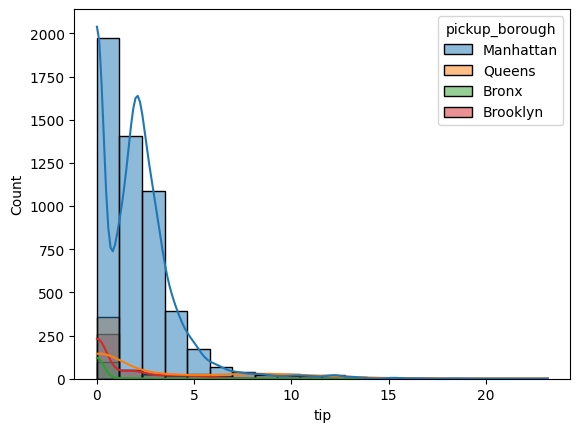

In [ ]:
sns.histplot(x=df['tip'],hue=df['pickup_borough'],bins=20,kde=True)
plt.show()

**Hypothesis**

- H0: distribution of tip is the same across all pickup_borough categories
- H1: Atleast one category has a different distribution of tip

In [ ]:
manhattan_tip = df['tip'][df['pickup_borough'] == 'Manhattan']
queens_tip = df['tip'][df['pickup_borough'] == 'Queens']
bronx_tip=df['tip'][df['pickup_borough'] == 'Bronx']
brooklyn_tip=df['tip'][df['pickup_borough'] == 'Brooklyn']

In [ ]:
# ANOVA Test
#Annova test used to determine if there is a significant difference between the means of three or more independent groups
# regions = [group['Spending_Score'].values for name, group in data.groupby('Region')]


f_stat, p_val = stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
# print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis.")

P-value: 5.155109332422435e-58
Reject null hypothesis


**Hypothesis for Tukey test(for each pair of groups)**
- h0 : distribution of group1 = distribution of group2
- h1 : distribution of group1 != distribution of group2

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#perform Tukey HSD
tukey_result=pairwise_tukeyhsd(endog=df['tip'],groups=df['pickup_borough'],alpha=0.05)
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


**for dropoff_borough**

In [ ]:
df['dropoff_borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
df['dropoff_borough'].value_counts()

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


/tmp/ipython-input-3691659603.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['dropoff_borough'], palette=['orange','green','yellow','blue'])
/tmp/ipython-input-3691659603.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['dropoff_borough'], palette=['orange','green','yellow','blue'])


<Axes: xlabel='dropoff_borough', ylabel='count'>

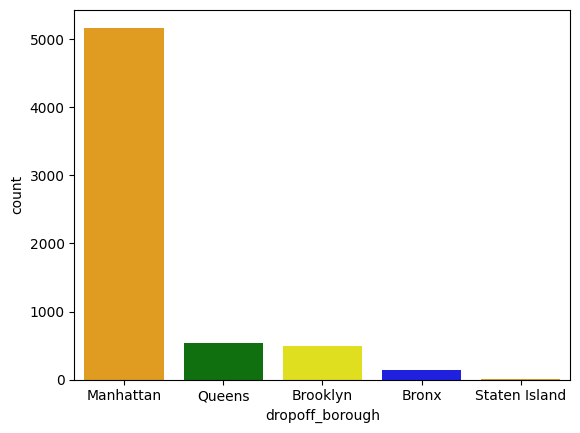

In [ ]:
sns.countplot(x=df['dropoff_borough'], palette=['orange','green','yellow','blue'])

In [ ]:
df['tip'].groupby(df['dropoff_borough']).std()

,tip
dropoff_borough,
Bronx,1.788795
Brooklyn,2.896229
Manhattan,2.052074
Queens,3.947016
Staten Island,2.976920


In [ ]:
df['tip'].groupby(df['dropoff_borough']).mean()

,tip
dropoff_borough,
Bronx,0.534706
Brooklyn,1.921590
Manhattan,1.964321
Queens,2.422022
Staten Island,14.165000


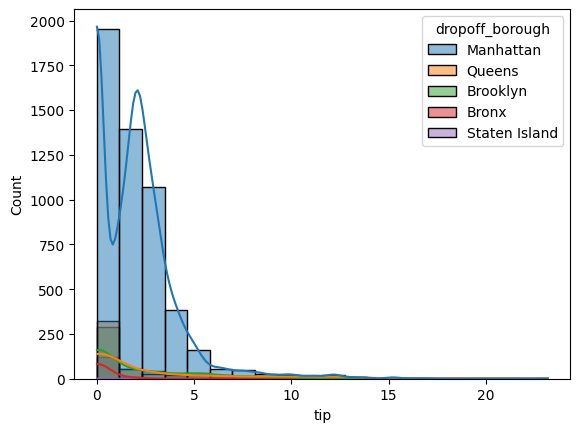

In [ ]:
sns.histplot(x=df['tip'],hue=df['dropoff_borough'],bins=20,kde=True)
plt.show()

**Hypothesis**

- H0: distribution of tip is the same across all dropoff_borough categories
- H1: Atleast one category has a different distribution of tip

In [ ]:
manhattan_tip = df['tip'][df['dropoff_borough'] == 'Manhattan']
queens_tip = df['tip'][df['dropoff_borough'] == 'Queens']
bronx_tip=df['tip'][df['dropoff_borough'] == 'Bronx']
brooklyn_tip=df['tip'][df['dropoff_borough'] == 'Brooklyn']

In [ ]:
# ANOVA Test

f_stat, p_val = stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
# print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis.")

P-value: 2.6378206902104746e-15
Reject null hypothesis


**Hypothesis for Tukey test(for each pair of groups)**
- h0 : distribution of group1 = distribution of group2
- h1 : distribution of group1 != distribution of group2

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#perform Tukey HSD
tukey_result=pairwise_tukeyhsd(endog=df['tip'],groups=df['dropoff_borough'],alpha=0.05)
print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

**- for pickup_zone**
**- Hypothesis**
- H0: distribution of tip is the same across all pickup_zone categories
- H1: At least one pickup_zone has a different distribution of tip

In [ ]:
df['pickup_zone'].value_counts()


,count
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Clinton East,208
Upper East Side South,208
Midtown East,196
...,...
Ozone Park,1
Glendale,1
Woodlawn/Wakefield,1


<Axes: xlabel='count', ylabel='pickup_zone'>

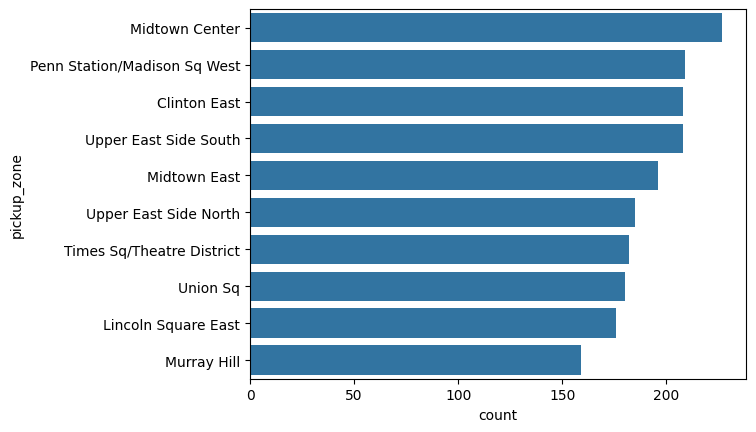

In [ ]:
sns.countplot(
    y=df['pickup_zone'],
    order=df['pickup_zone'].value_counts().head(10).index
)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Midtown Center'),
  Text(1, 0, 'Penn Station/Madison Sq West'),
  Text(2, 0, 'Clinton East'),
  Text(3, 0, 'Upper East Side South'),
  Text(4, 0, 'Midtown East'),
  Text(5, 0, 'Upper East Side North'),
  Text(6, 0, 'Times Sq/Theatre District'),
  Text(7, 0, 'Union Sq'),
  Text(8, 0, 'Lincoln Square East'),
  Text(9, 0, 'Murray Hill')])

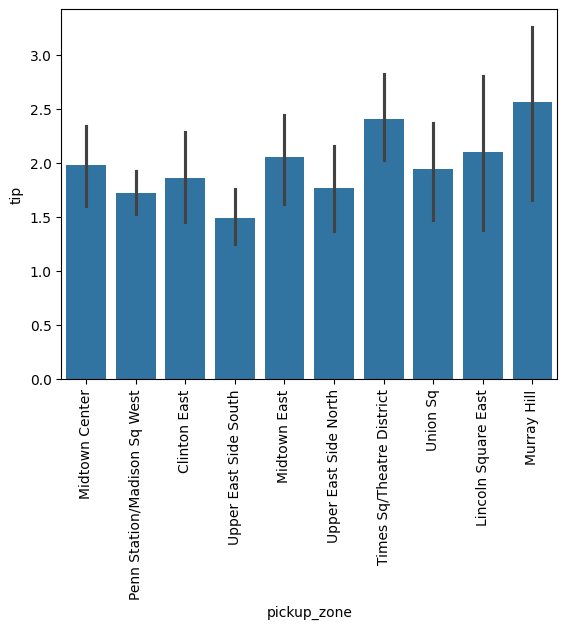

In [ ]:
sns.barplot(
    x=df['pickup_zone'],
    y=df['tip'],
    estimator='std',
    order=df['pickup_zone'].value_counts().head(10).index
)
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Midtown Center'),
  Text(1, 0, 'Penn Station/Madison Sq West'),
  Text(2, 0, 'Clinton East'),
  Text(3, 0, 'Upper East Side South'),
  Text(4, 0, 'Midtown East'),
  Text(5, 0, 'Upper East Side North'),
  Text(6, 0, 'Times Sq/Theatre District'),
  Text(7, 0, 'Union Sq'),
  Text(8, 0, 'Lincoln Square East'),
  Text(9, 0, 'Murray Hill')])

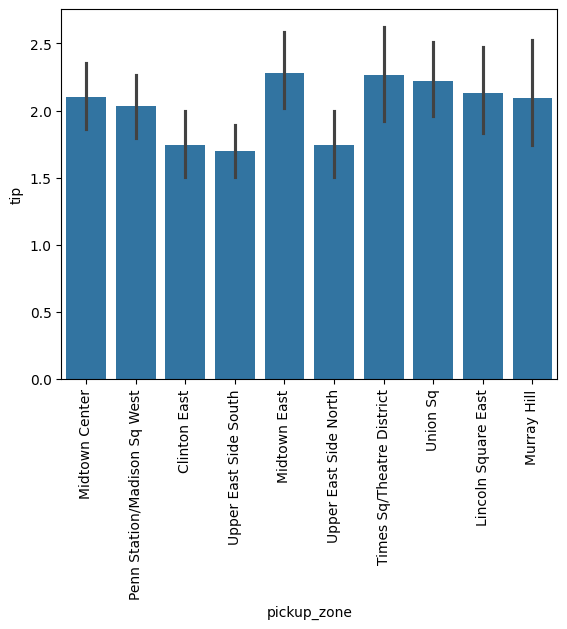

In [ ]:
sns.barplot(
    x=df['pickup_zone'],
    y=df['tip'],
    estimator='mean',
    order=df['pickup_zone'].value_counts().head(10).index
)
plt.xticks(rotation=90)


In [ ]:
# sns.histplot(
#     x=df['tip'],
#     hue=df['pickup_zone'],
#     bins=20,
#     kde=True
# )
# plt.show()


In [ ]:
zones = df['pickup_zone'].unique()

groups = [
    df[df['pickup_zone'] == zone]['tip']
    for zone in zones
]

from scipy import stats
f_stat, p_val = stats.f_oneway(*groups)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


P-value: 7.89243482213084e-169
Reject null hypothesis


In [150]:
zones = df['dropoff_zone'].unique()

groups = [
    df[df['dropoff_zone'] == zone]['tip']
    for zone in zones
]

f_stat, p_val = stats.f_oneway(*groups)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


P-value: 1.3107168403745948e-120
Reject null hypothesis


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), o

**For Numerical cols to Numerical cols**

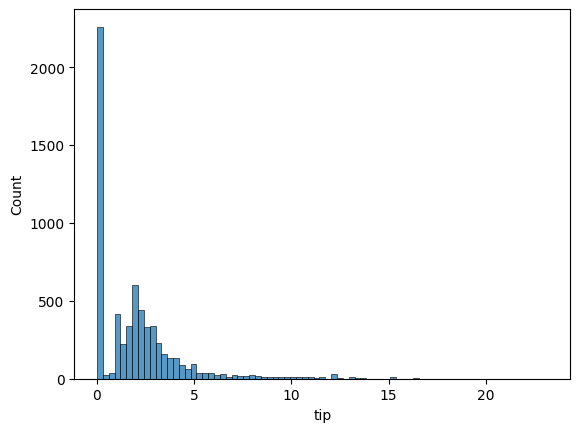

In [156]:
sns.histplot(df['tip'])
plt.show()

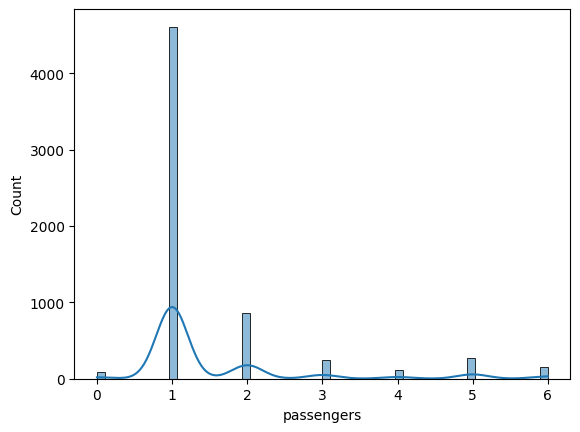

In [157]:
sns.histplot(df['passengers'],kde=True)
plt.show()

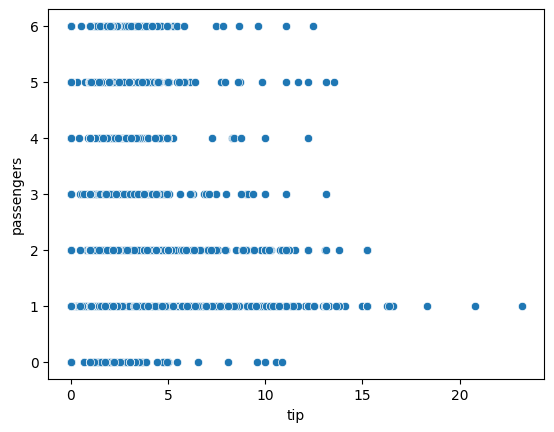

In [159]:
sns.scatterplot(x=df['tip'],y=df['passengers'])
plt.show()

**Hyposthesis for correlation of numeric variables**
- h0:correlation is zero
- h1:there is significant correlation(not zero)

In [160]:
r,p_val=stats.spearmanr(df['tip'],df['passengers'])
print("correlation:",r)
print("P-value ;",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis:There is no relation")
else:
  print("Fail to reject null hypothesis")


correlation: 0.027509812818779178
P-value ; 0.028480753176042872
Reject null hypothesis:There is no relation


In [161]:
r,p_val=stats.pearsonr(df['tip'],df['passengers'])
print("correlation:",r)
print("P-value ;",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis:There is no relation")
else:
  print("Fail to reject null hypothesis")

correlation: 0.017838280361313713
P-value ; 0.15551969503298518
Fail to reject null hypothesis


In [162]:
r,p_val=stats.spearmanr(df['tip'],df['tolls'])
print("correlation:",r)
print("P-value ;",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis:There is no relation")
else:
  print("Fail to reject null hypothesis")

correlation: 0.175380002891528
P-value ; 5.643276180955435e-45
Reject null hypothesis:There is no relation


In [163]:
r,p_val=stats.pearsonr(df['tip'],df['tolls'])
print("correlation:",r)
print("P-value ;",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis:There is no relation")
else:
  print("Fail to reject null hypothesis")

correlation: 0.41467000187389874
P-value ; 4.5828986386065086e-262
Reject null hypothesis:There is no relation
